In [1]:
#Import necessary libraries
import pandas as pd  #pandas for data manipulation and analysis
import numpy as np   #numpy for numerical operations
from pprint import PrettyPrinter  #pprint for pretty printing of data structures
from datetime import datetime, time  #datetime for working with dates and times
import matplotlib.pyplot as plt  #matplotlib for basic data visualization
import seaborn as sns  #seaborn for statistical data visualization
import plotly.express as px  #plotly express for interactive and expressive visualizations

In [2]:
df1 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\final_data_Employee_Attrition.csv")

In [2]:
import mysql.connector as sql
import pymysql 
from sqlalchemy import create_engine

In [3]:
# CONNECTING WITH MYSQL DATABASE
user="root"
password="1234"
host="127.0.0.1"
database= "project-employeeattrition"
port = "3306"

In [4]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
con = engine.connect()

## Exploratory Data Analysis

In [6]:
attrition_rate_query = """
SELECT 
    (SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS AttritionRate,
    (SUM(CASE WHEN Attrition = 'No' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS RetentionRate
FROM employee_attrition_data;
"""
attrition_rate_df = pd.read_sql_query(attrition_rate_query, con)

attrition_count_query = """
SELECT 
    Attrition,
    COUNT(*) AS Count
FROM employee_attrition_data
GROUP BY Attrition;
"""
attrition_count_df = pd.read_sql_query(attrition_count_query, con)

# Calculate Overall Attrition Rate and Retention Rate
overall_attrition_rate = attrition_rate_df["AttritionRate"].values[0]
retention_rate = attrition_rate_df["RetentionRate"].values[0]

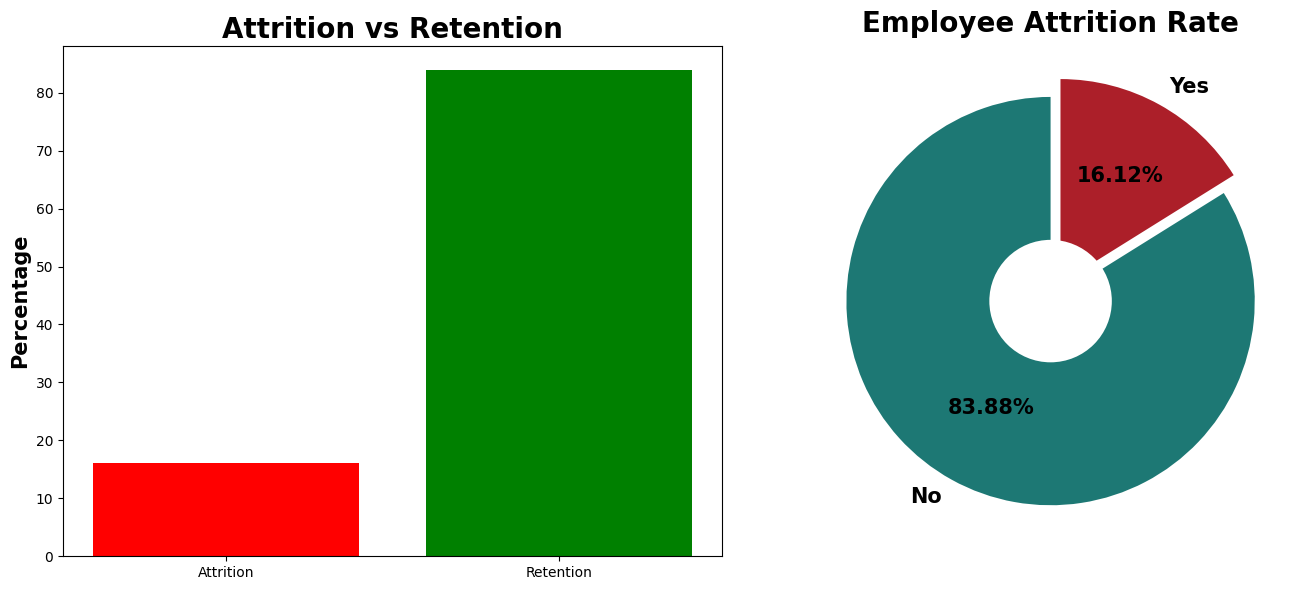

In [7]:
attrition_rate = attrition_count_df.set_index('Attrition')['Count']

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart for Attrition and Retention
axes[0].bar(["Attrition", "Retention"], [overall_attrition_rate, retention_rate], color=['red', 'green'])
axes[0].set_ylabel("Percentage", fontweight="black", fontsize=15)
axes[0].set_title("Attrition vs Retention", fontweight="black", fontsize=20)

# Pie Chart for Employee Attrition Rate
labels = ["No", "Yes"]
axes[1].pie(attrition_rate, labels=labels, autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors=["#1d7874","#AC1F29"], explode=[0,0.1], startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
axes[1].add_artist(center_circle)
axes[1].set_title("Employee Attrition Rate", fontweight="black", fontsize=20, pad=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

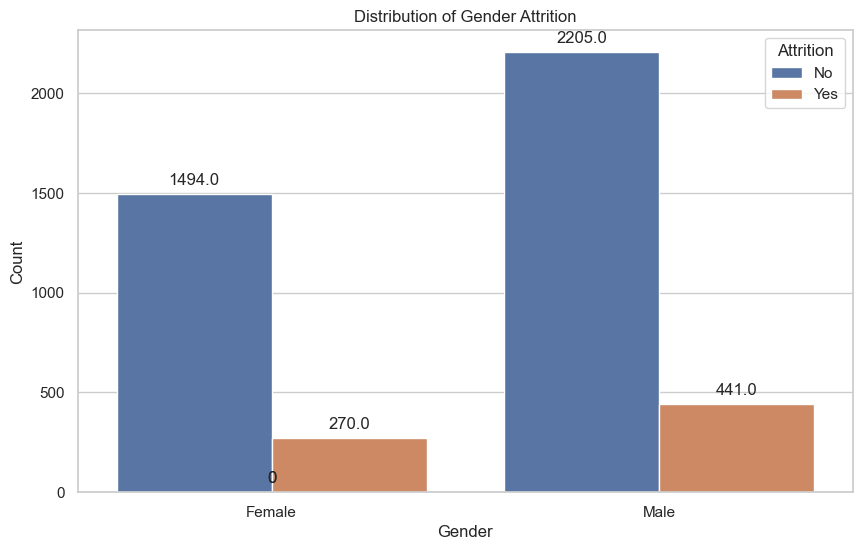

In [8]:
query = """
SELECT 
    Gender,
    Attrition
FROM 
    employee_attrition_data;
"""
df = pd.read_sql_query(query, con)

# Step 5: Create the plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.countplot(x="Gender", hue="Attrition", data=df)

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender Attrition")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

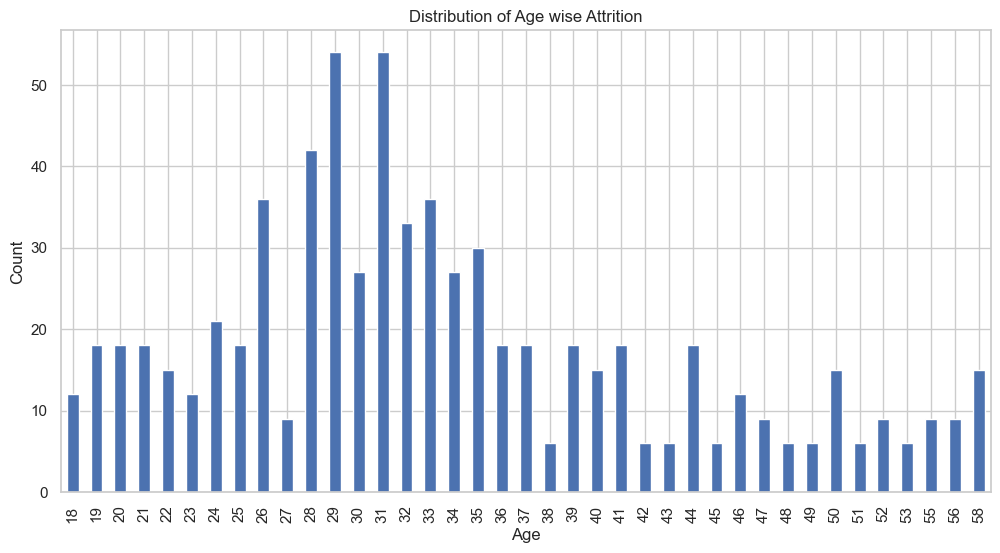

In [11]:
query = """
SELECT 
    Age, 
    COUNT(*) AS Count
FROM 
    employee_attrition_data
WHERE 
    Attrition = 'Yes'
GROUP BY 
    Age
ORDER BY 
    Age;
"""
df2 = pd.read_sql_query(query, con)

# Step 5: Create the plot using Matplotlib
df2.set_index('Age', inplace=True)
df2.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Number of Employees with Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of Age wise Attrition")
plt.show()

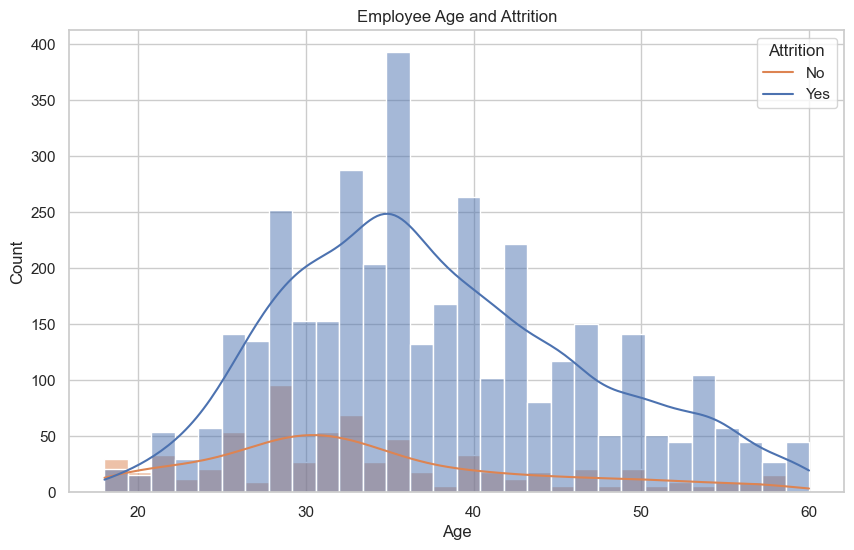

In [12]:
query = """
SELECT 
    Age,
    Attrition
FROM 
    employee_attrition_data;  # Ensure this is the correct table name
"""
df = pd.read_sql_query(query, con)

# Step 5: Create the plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(x="Age", hue="Attrition", data=df, kde=True, bins=30)
plt.title("Employee Age and Attrition")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

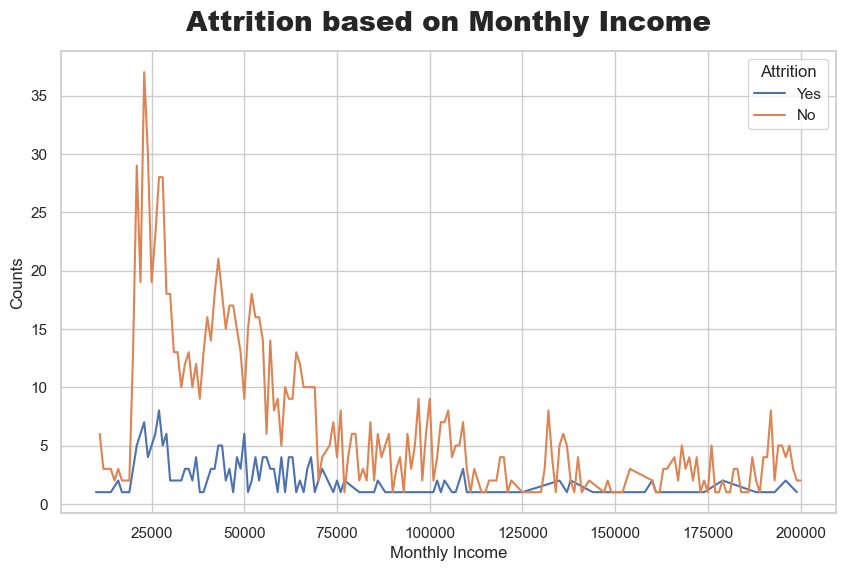

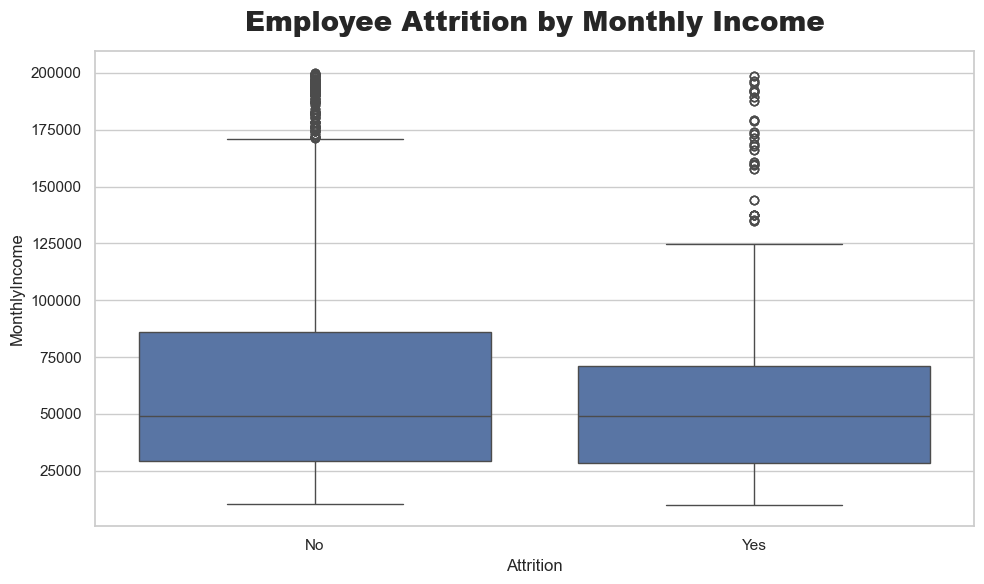

In [13]:
query = """
SELECT 
    MonthlyIncome,
    Attrition
FROM 
    employee_attrition_data; 
"""
df = pd.read_sql_query(query, con)

# Step 5: Process the data
# Group by Monthly Income and Attrition, and count the occurrences
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=rate_att, x='MonthlyIncome', y='Counts', hue='Attrition')
plt.title('Attrition based on Monthly Income', fontweight="black", size=20, pad=15)
plt.xlabel('Monthly Income')
plt.ylabel('Counts')
plt.show()

# Visualization to show Employee Attrition by Monthly Income
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Employee Attrition by Monthly Income", fontweight="black", size=20, pad=15)
plt.tight_layout()
plt.show()

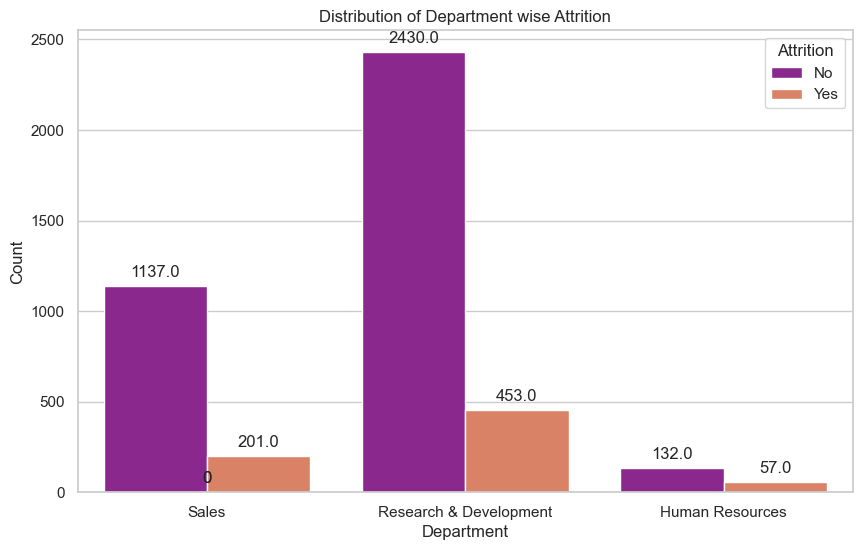

In [16]:
query = """SELECT 
    Department,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    Department, Attrition;"""
df = pd.read_sql_query(query, con)
# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="Department", y="Count", hue="Attrition", data=df, palette="plasma")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Distribution of Department wise Attrition")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

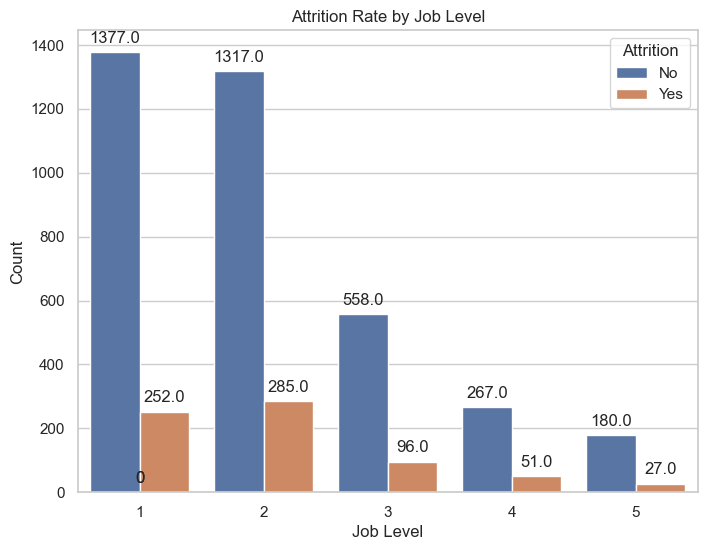

In [30]:
query = """
SELECT 
    JobLevel,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    JobLevel, Attrition;
"""

df = pd.read_sql_query(query, con)
# Set up the plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="JobLevel",y="Count", hue="Attrition", data=df, palette="deep")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add title and labels
plt.title("Attrition Rate by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Count")

# Show the plot
plt.show()

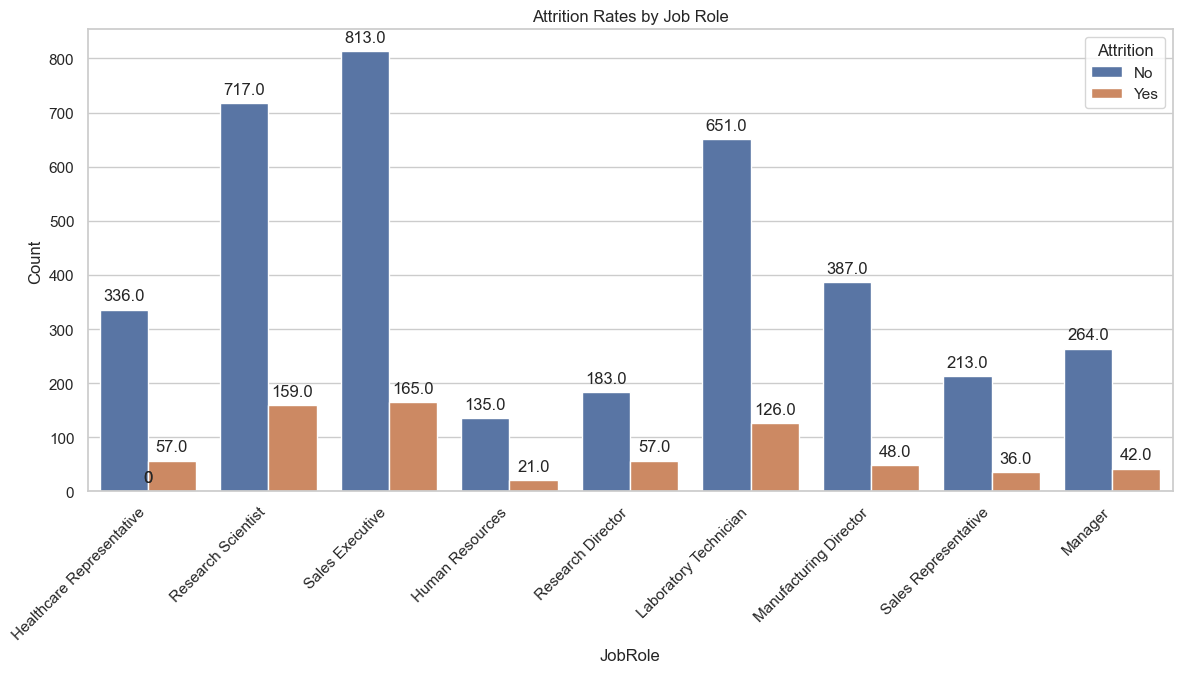

In [35]:
# Execute SQL query to fetch data
query = """
SELECT 
    JobRole,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    JobRole, Attrition;
"""

df = pd.read_sql_query(query, con)

# Set up the plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="JobRole",y="Count", hue="Attrition", data=df, palette="deep")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add title and labels
plt.title("Attrition Rates by Job Role")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


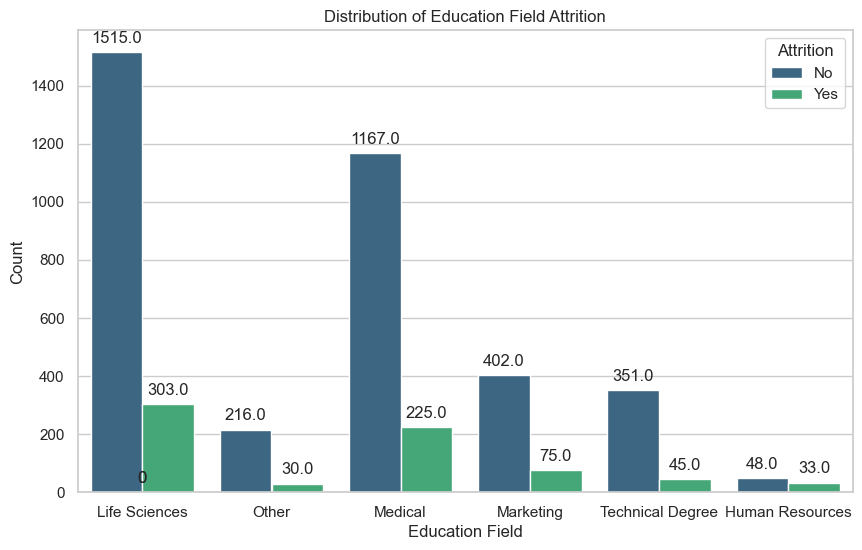

In [39]:
query = """
SELECT 
    EducationField,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    EducationField, Attrition;
"""
df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="EducationField",y="Count", hue="Attrition", data=df, palette="viridis")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Education Field")
plt.ylabel("Count")
plt.title("Distribution of Education Field Attrition")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

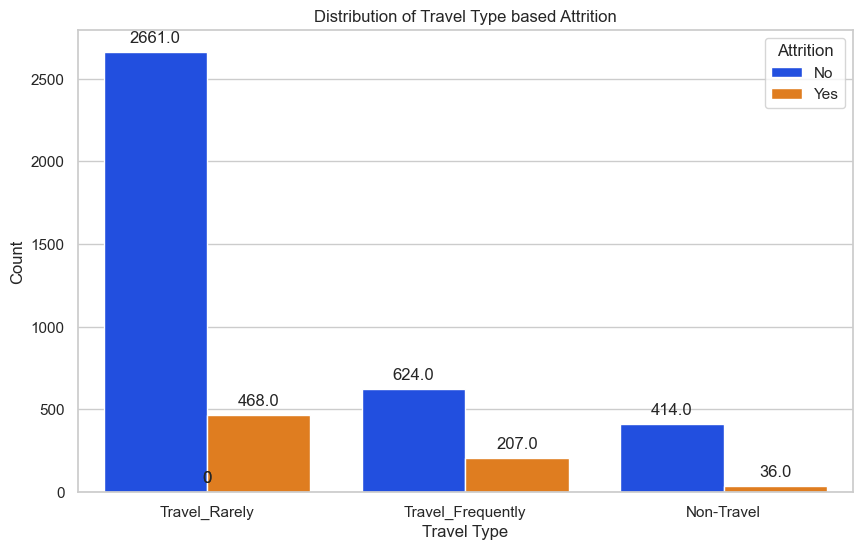

In [41]:
query = """
SELECT 
    BusinessTravel,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    BusinessTravel, Attrition;
"""

df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="BusinessTravel", y="Count", hue="Attrition", data=df, palette="bright")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Travel Type")
plt.ylabel("Count")
plt.title("Distribution of Travel Type based Attrition")

# Show the plot
plt.legend(title="Attrition")  
plt.show()

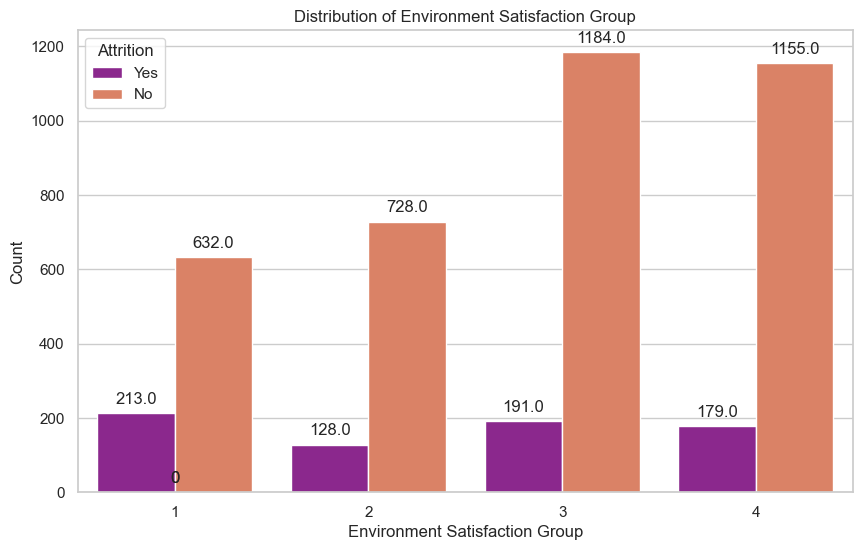

In [42]:
query = """
SELECT 
    EnvironmentSatisfaction,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    EnvironmentSatisfaction, Attrition;
"""

df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="EnvironmentSatisfaction", y="Count", hue="Attrition", data=df, palette="plasma")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Environment Satisfaction Group")
plt.ylabel("Count")
plt.title("Distribution of Environment Satisfaction Group")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

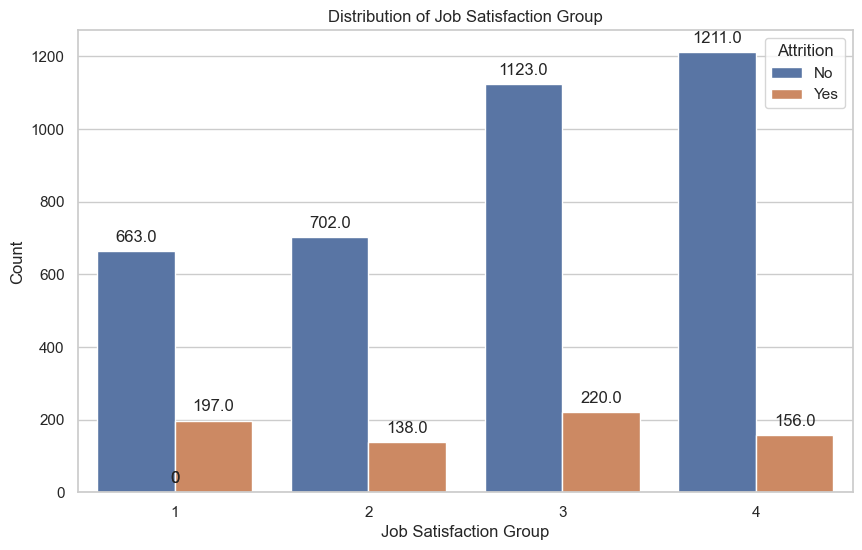

In [43]:
query = """
SELECT 
    JobSatisfaction,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    JobSatisfaction, Attrition;
"""

df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="JobSatisfaction", y="Count", hue="Attrition", data=df, palette="deep")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Job Satisfaction Group")
plt.ylabel("Count")
plt.title("Distribution of Job Satisfaction Group")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

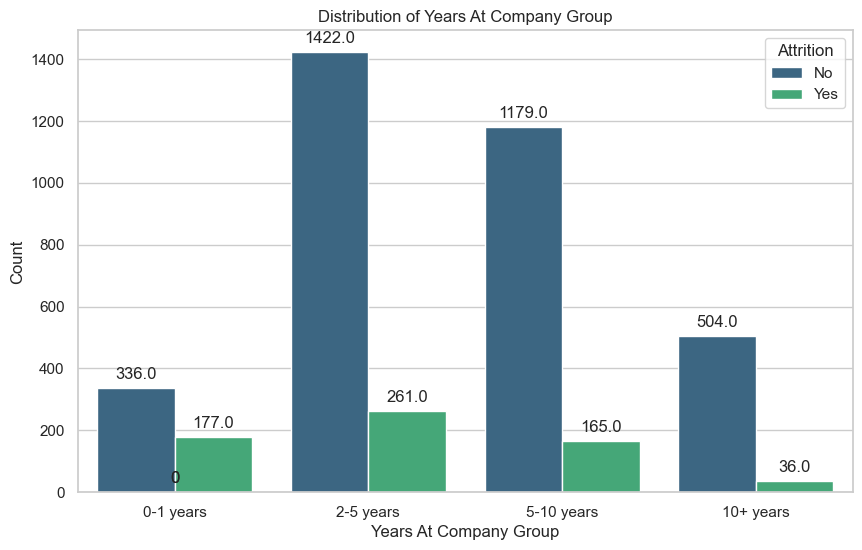

In [45]:
query = """
SELECT 
    Years_At_Company_Bin,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    Years_At_Company_Bin, Attrition;
"""
df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="Years_At_Company_Bin", y="Count", hue="Attrition", data=df, palette="viridis")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Years At Company Group")
plt.ylabel("Count")
plt.title("Distribution of Years At Company Group")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

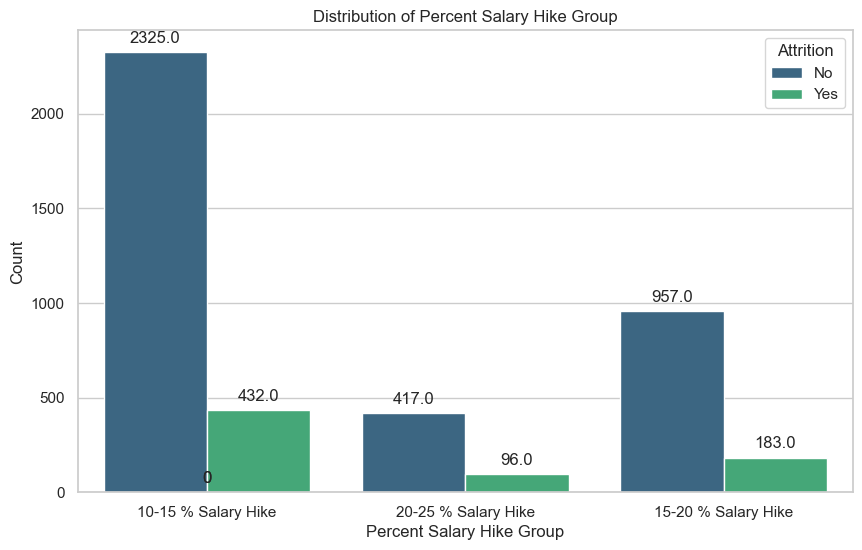

In [46]:
query = """
SELECT 
    Percent_Salary_Hike_Bin,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    Percent_Salary_Hike_Bin, Attrition;
"""
df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="Percent_Salary_Hike_Bin", y="Count", hue="Attrition", data=df, palette="viridis")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Percent Salary Hike Group")
plt.ylabel("Count")
plt.title("Distribution of Percent Salary Hike Group")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

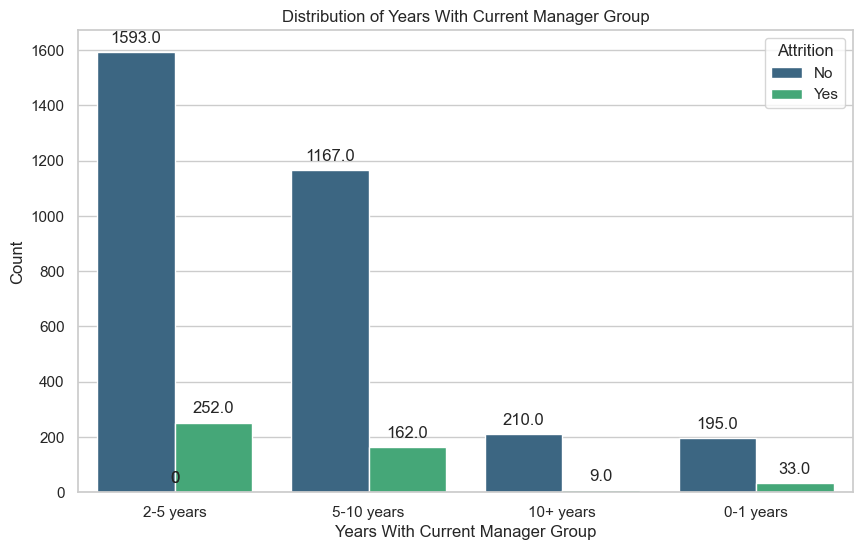

In [47]:
query = """
SELECT 
    Years_With_Current_Manager_Bin,
    Attrition,
    COUNT(*) AS Count
FROM 
    employee_attrition_data
GROUP BY 
    Years_With_Current_Manager_Bin, Attrition;
"""
df = pd.read_sql_query(query, con)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with hue
ax = sns.barplot(x="Years_With_Current_Manager_Bin", y="Count", hue="Attrition", data=df, palette="viridis")

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel("Years With Current Manager Group")
plt.ylabel("Count")
plt.title("Distribution of Years With Current Manager Group")

# Show the plot
plt.legend(title="Attrition")  # Add legend with the hue column title
plt.show()

## Model Prediction

In [35]:
Cat_Col = [i for i in df.columns if df[i].dtype == 'O']
Num_col = [i for i in df.columns if i not in Cat_Col]

In [28]:
Cat_Col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [29]:
for i in Cat_Col:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df[i]))
    #Print the count of each unique value in the current categorical column
    print(df[i].value_counts())
    #Print a separator line for better readability
    print(" ")

Unique values of Attrition {'Yes', 'No'}
Attrition
No     3699
Yes     711
Name: count, dtype: int64
 
Unique values of BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
 
Unique values of Department {'Research & Development', 'Human Resources', 'Sales'}
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
 
Unique values of EducationField {'Life Sciences', 'Other', 'Medical', 'Human Resources', 'Technical Degree', 'Marketing'}
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64
 
Unique values of Gender {'Male', 'Female'}
Gender
Male      2646
Female    1764
Name: count, dtype: int64
 
Unique values of JobRole {'Sales Executive', 'Sales R

In [30]:
df.drop(columns=['Unnamed: 0','EmployeeCount','EmployeeID','Over18','Years_At_Company_Bin','Percent_Salary_Hike_Bin','Years_With_Current_Manager_Bin','StandardHours'],inplace=True)

In [33]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Avg_Working_time           float64
dtype: object

In [36]:
Num_col

['Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'JobInvolvement',
 'PerformanceRating',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'Avg_Working_time']

In [38]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,3,3,3.0,4.0,2.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,2,4,3.0,2.0,4.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,2,5,0,3,3,3,2.0,2.0,1.0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,8,7,5,2,3,4.0,4.0,3.0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,6,0,4,3,3,4.0,1.0,3.0,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,5,3,0,2,3,3,4.0,1.0,3.0,8.522277
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,2,3,0,2,2,3,4.0,4.0,3.0,6.092954
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,4,4,1,2,3,4,1.0,3.0,3.0,7.706632
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,2,9,7,8,2,3,4.0,1.0,3.0,9.492595


In [39]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_columns = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

data = df

# Create a LabelEncoder object for each categorical column
encoders = {}
for col in categorical_columns:
  encoders[col] = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
  data[col] = encoders[col].fit_transform(data[col])

# Save the encoders as a pickle file
with open('EA_encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

### Unbalanced Data

In [93]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time
0,51,0,2,2,6,2,1,0,1,0,...,6,1,0,0,3,3,3,4,2,7.373651
1,31,1,1,1,10,1,1,0,1,6,...,3,5,1,4,2,4,3,2,4,7.718969
2,32,0,1,1,17,4,4,1,4,7,...,2,5,0,3,3,3,2,2,1,7.013240
3,38,0,0,1,2,5,1,1,3,1,...,5,8,7,5,2,3,4,4,3,7.193678
4,32,0,2,1,10,1,3,1,1,7,...,2,6,0,4,3,3,4,1,3,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,0,1,6,...,5,3,0,2,3,3,4,1,3,8.522277
4406,29,0,2,1,2,4,3,1,1,2,...,2,3,0,2,2,3,4,4,3,6.092954
4407,25,0,2,1,25,2,1,1,2,7,...,4,4,1,2,3,4,1,3,3,7.706632
4408,42,0,2,2,18,2,3,1,1,2,...,2,9,7,8,2,3,4,1,3,9.492595


In [40]:
df['Attrition'].value_counts()

Attrition
0    3699
1     711
Name: count, dtype: int64

In [41]:
from scipy.stats import skew
df.select_dtypes(include=['int64', 'float64']).skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.033363
PercentSalaryHike          0.820569
StockOptionLevel           0.968321
TotalWorkingYears          1.116365
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
JobInvolvement            -0.498080
PerformanceRating          1.920574
EnvironmentSatisfaction   -0.328260
JobSatisfaction           -0.332530
WorkLifeBalance           -0.567064
Avg_Working_time           0.863133
dtype: float64

In [42]:
df.Attrition.value_counts(normalize=True)*100

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

### In Our Data we 83% of No datapoint and 16% of Yes data point , So In predict it will mislead

### Rectify Balanced Data -- Using Oversampling

In [43]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [44]:
from imblearn.combine import SMOTETomek

model = SMOTETomek()
x_new , y_new = model.fit_resample(x,y)
x_new.shape,y_new.shape

((7398, 25), (7398,))

In [45]:
y_new.value_counts(normalize=True)

Attrition
0    0.5
1    0.5
Name: proportion, dtype: float64

In [46]:
x_new

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time
0,51,2,2,6,2,1,0,1,0,1,...,6,1,0,0,3,3,3.000000,4.000000,2.000000,7.373651
1,31,1,1,10,1,1,0,1,6,2,...,3,5,1,4,2,4,3.000000,2.000000,4.000000,7.718969
2,32,1,1,17,4,4,1,4,7,1,...,2,5,0,3,3,3,2.000000,2.000000,1.000000,7.013240
3,38,0,1,2,5,1,1,3,1,1,...,5,8,7,5,2,3,4.000000,4.000000,3.000000,7.193678
4,32,2,1,10,1,3,1,1,7,2,...,2,6,0,4,3,3,4.000000,1.000000,3.000000,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,46,1,0,8,3,0,1,3,2,1,...,2,5,0,4,3,3,3.718569,1.562862,3.000000,7.754998
7394,30,2,1,10,3,1,0,1,7,2,...,2,1,0,0,2,3,1.813338,3.440013,2.186662,7.922090
7395,20,2,1,2,2,1,0,2,6,2,...,3,1,0,0,3,3,4.000000,1.000000,3.000000,8.316032
7396,55,2,0,16,3,4,0,3,4,2,...,2,9,7,3,3,3,3.011915,3.976171,2.011915,6.408345


In [47]:
y_new

0       0
1       1
2       0
3       0
4       0
       ..
7393    1
7394    1
7395    1
7396    1
7397    1
Name: Attrition, Length: 7398, dtype: int32

In [48]:
x_new['Attrition'] = y_new
x_new.to_csv('EA_classification_dataset.csv',index=False)

In [49]:
df = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\EA_classification_dataset.csv")
df 

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time,Attrition
0,51,2,2,6,2,1,0,1,0,1,...,1,0,0,3,3,3.000000,4.000000,2.000000,7.373651,0
1,31,1,1,10,1,1,0,1,6,2,...,5,1,4,2,4,3.000000,2.000000,4.000000,7.718969,1
2,32,1,1,17,4,4,1,4,7,1,...,5,0,3,3,3,2.000000,2.000000,1.000000,7.013240,0
3,38,0,1,2,5,1,1,3,1,1,...,8,7,5,2,3,4.000000,4.000000,3.000000,7.193678,0
4,32,2,1,10,1,3,1,1,7,2,...,6,0,4,3,3,4.000000,1.000000,3.000000,8.006175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,46,1,0,8,3,0,1,3,2,1,...,5,0,4,3,3,3.718569,1.562862,3.000000,7.754998,1
7394,30,2,1,10,3,1,0,1,7,2,...,1,0,0,2,3,1.813338,3.440013,2.186662,7.922090,1
7395,20,2,1,2,2,1,0,2,6,2,...,1,0,0,3,3,4.000000,1.000000,3.000000,8.316032,1
7396,55,2,0,16,3,4,0,3,4,2,...,9,7,3,3,3,3.011915,3.976171,2.011915,6.408345,1


In [63]:
x = df.drop('Attrition',axis=True)
y = df['Attrition']

In [51]:
x

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time
0,51,2,2,6,2,1,0,1,0,1,...,6,1,0,0,3,3,3.000000,4.000000,2.000000,7.373651
1,31,1,1,10,1,1,0,1,6,2,...,3,5,1,4,2,4,3.000000,2.000000,4.000000,7.718969
2,32,1,1,17,4,4,1,4,7,1,...,2,5,0,3,3,3,2.000000,2.000000,1.000000,7.013240
3,38,0,1,2,5,1,1,3,1,1,...,5,8,7,5,2,3,4.000000,4.000000,3.000000,7.193678
4,32,2,1,10,1,3,1,1,7,2,...,2,6,0,4,3,3,4.000000,1.000000,3.000000,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,46,1,0,8,3,0,1,3,2,1,...,2,5,0,4,3,3,3.718569,1.562862,3.000000,7.754998
7394,30,2,1,10,3,1,0,1,7,2,...,2,1,0,0,2,3,1.813338,3.440013,2.186662,7.922090
7395,20,2,1,2,2,1,0,2,6,2,...,3,1,0,0,3,3,4.000000,1.000000,3.000000,8.316032
7396,55,2,0,16,3,4,0,3,4,2,...,2,9,7,3,3,3,3.011915,3.976171,2.011915,6.408345


In [52]:
y

0       0
1       1
2       0
3       0
4       0
       ..
7393    1
7394    1
7395    1
7396    1
7397    1
Name: Attrition, Length: 7398, dtype: int64

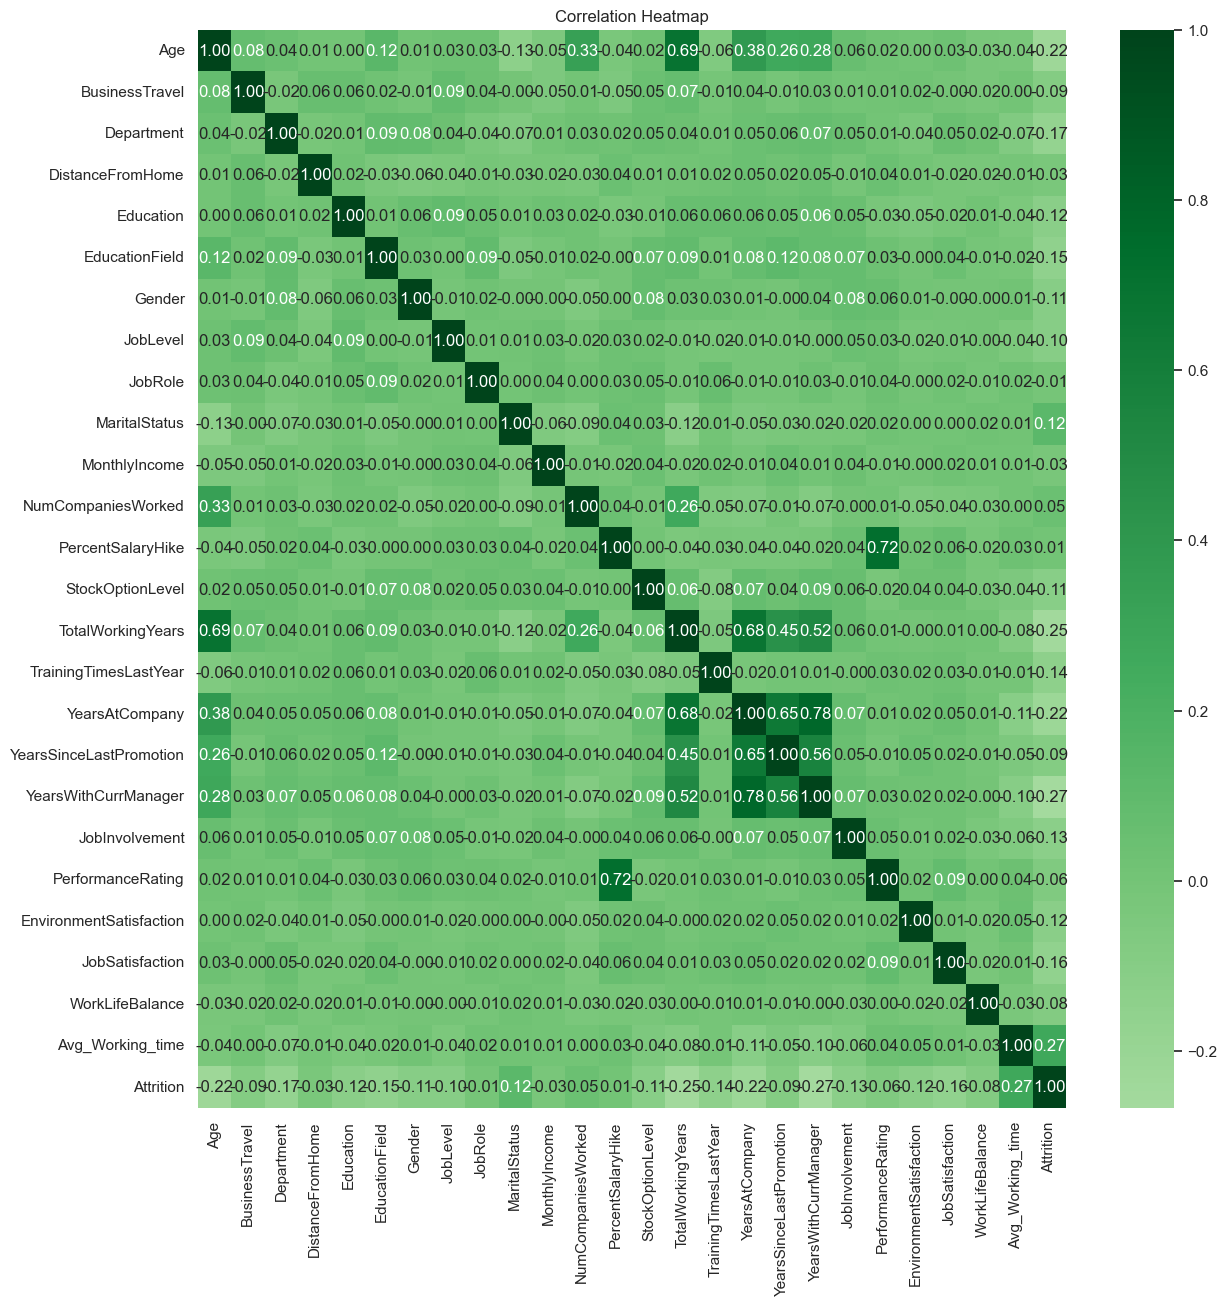

In [58]:
x=df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(x, annot=True, fmt=".2f", cmap="Greens", center=0)
plt.title('Correlation Heatmap')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc , accuracy_score
import matplotlib.pyplot as plt
import pickle

In [64]:
def model_classification(x,y,algorithm):

  for i in algorithm:
    # Split data
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

    # Model
    model = i().fit(xtrain,ytrain)

    # Predict for train and test accuracy
    y_train_pred = model.predict(xtrain)
    y_test_pred  = model.predict(xtest)

    # Accuracy score
    training = accuracy_score(ytrain,y_train_pred)
    testing = accuracy_score(ytest,y_test_pred)

    data = {'Algorithm':i.__name__, 'Training Acuuracy':training,'Testing Accuracy':testing}
    print(data)

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
%%time
model_classification(x,y,[LogisticRegression, DecisionTreeClassifier,ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier])

{'Algorithm': 'LogisticRegression', 'Training Acuuracy': 0.7162892869212572, 'Testing Accuracy': 0.6993243243243243}
{'Algorithm': 'DecisionTreeClassifier', 'Training Acuuracy': 1.0, 'Testing Accuracy': 0.9898648648648649}
{'Algorithm': 'ExtraTreesClassifier', 'Training Acuuracy': 1.0, 'Testing Accuracy': 0.995945945945946}
{'Algorithm': 'RandomForestClassifier', 'Training Acuuracy': 1.0, 'Testing Accuracy': 0.995945945945946}
{'Algorithm': 'AdaBoostClassifier', 'Training Acuuracy': 0.8394727948631294, 'Testing Accuracy': 0.8344594594594594}
{'Algorithm': 'GradientBoostingClassifier', 'Training Acuuracy': 0.9193984454207502, 'Testing Accuracy': 0.9027027027027027}
{'Algorithm': 'XGBClassifier', 'Training Acuuracy': 1.0, 'Testing Accuracy': 1.0}
CPU times: total: 6.12 s
Wall time: 7.74 s


### Extreme Gradient Boosting Classifier performs well, next to that Extra Tree Classifier & Random Forest Classifier model performs well.

# Extreme Gradient Boosting Classifier

Detailed Analysis of XGBClassifier Model
 
Accuracy :  1.0
Precision score :  1.0
F1 score :  1.0
Recall :  1.0
Confusion Matrix:
[[712   0]
 [  0 768]]
ROC AUC Score for Model: 1.0
#=========#=========#
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       1.00      1.00      1.00       768

    accuracy                           1.00      1480
   macro avg       1.00      1.00      1.00      1480
weighted avg       1.00      1.00      1.00      1480



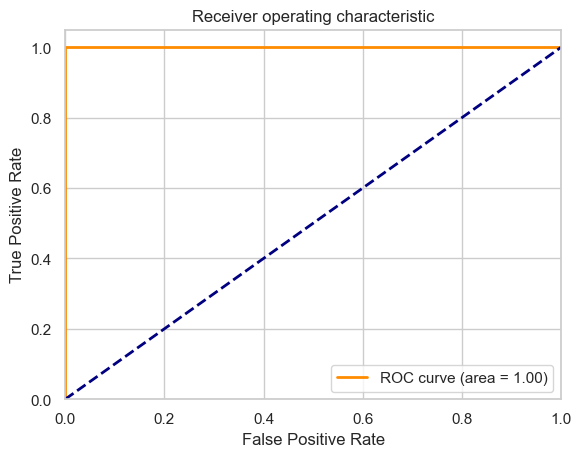

 
Training Accuracy :  1.0
Test Accuracy :  1.0


In [109]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model_1 = XGBClassifier()
model_1.fit(xtrain, ytrain)
X_test_pred_1 = model_1.predict(xtest)
X_train_pred_1 = model_1.predict(xtrain)
print("Detailed Analysis of XGBClassifier Model")
print(" ")
print("Accuracy : ", accuracy_score(ytest, X_test_pred_1))
print("Precision score : ", precision_score(ytest, X_test_pred_1))
print("F1 score : ", f1_score(ytest, X_test_pred_1))
print("Recall : ", recall_score(ytest, X_test_pred_1))
cm = confusion_matrix(ytest, X_test_pred_1)
print(f"Confusion Matrix:\n{cm}")

y_prob_1 = model_1.predict_proba(xtest)[:, 1]
roc_score_1 = roc_auc_score(ytest, y_prob_1)
print('ROC AUC Score for Model:', roc_score_1)

print('#=========#=========#')
print(" ")

print(classification_report(ytest, X_test_pred_1))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, X_test_pred_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(" ")
print("Training Accuracy : ", accuracy_score(ytrain, X_train_pred_1))
print("Test Accuracy : ", accuracy_score(ytest, X_test_pred_1))

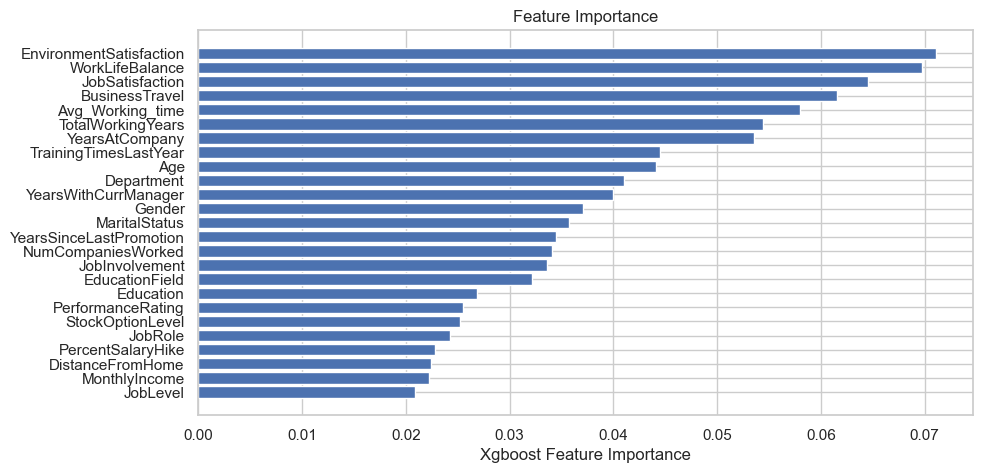

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model_1 = XGBClassifier()
model_1.fit(xtrain, ytrain)

sorted_idx = model_1.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(x.columns[sorted_idx], model_1.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title("Feature Importance")

plt.show()

## Extra Tree Classifier

Detailed Analysis of ExtraTreesClassifier Model
 
Accuracy :  0.9993243243243243
Precision score :  1.0
F1 score :  0.999330207635633
Recall :  0.998661311914324
Confusion Matrix:
[[733   0]
 [  1 746]]
ROC AUC Score for Model 2: 1.0
#=========#=========#
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00       747

    accuracy                           1.00      1480
   macro avg       1.00      1.00      1.00      1480
weighted avg       1.00      1.00      1.00      1480



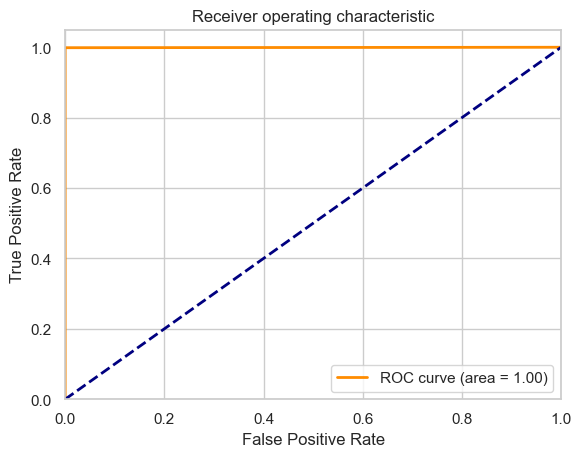

 
Training Accuracy :  1.0
Test Accuracy :  0.9993243243243243


In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model_2 = ExtraTreesClassifier()
model_2.fit(xtrain, ytrain)
X_train_pred_2 = model_2.predict(xtrain)
X_test_pred_2 = model_2.predict(xtest)
print("Detailed Analysis of ExtraTreesClassifier Model")
print(" ")
print("Accuracy : ", accuracy_score(ytest, X_test_pred_2))
print("Precision score : ", precision_score(ytest, X_test_pred_2))
print("F1 score : ", f1_score(ytest, X_test_pred_2))
print("Recall : ", recall_score(ytest, X_test_pred_2))
cm = confusion_matrix(ytest, X_test_pred_2)
print(f"Confusion Matrix:\n{cm}")

y_prob_2 = model_2.predict_proba(xtest)[:, 1]
roc_score_2 = roc_auc_score(ytest, y_prob_2)
print('ROC AUC Score for Model 2:', roc_score_2)

print('#=========#=========#')

print(classification_report(ytest, X_test_pred_2))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, X_test_pred_2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(" ")
print("Training Accuracy : ", accuracy_score(ytrain, X_train_pred_2))
print("Test Accuracy : ", accuracy_score(ytest, X_test_pred_2))

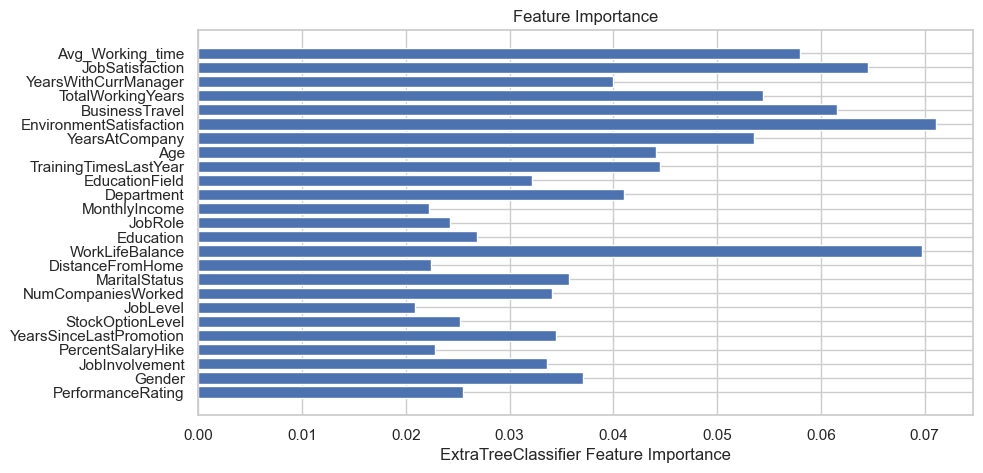

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model_2 = ExtraTreesClassifier()
model_2.fit(xtrain, ytrain)

sorted_idx = model_2.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(x.columns[sorted_idx], model_1.feature_importances_[sorted_idx])
plt.xlabel("ExtraTreeClassifier Feature Importance")
plt.title("Feature Importance")

plt.show()

## Random Forest Classifier

Detailed Analysis of RandomForestClassifier Model
 
Accuracy :  0.9986486486486487
Precision score :  1.0
F1 score :  0.9986033519553074
Recall :  0.99721059972106
Confusion Matrix:
[[763   0]
 [  2 715]]
ROC AUC Score for Model 2: 1.0
#=========#=========#
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       763
           1       1.00      1.00      1.00       717

    accuracy                           1.00      1480
   macro avg       1.00      1.00      1.00      1480
weighted avg       1.00      1.00      1.00      1480



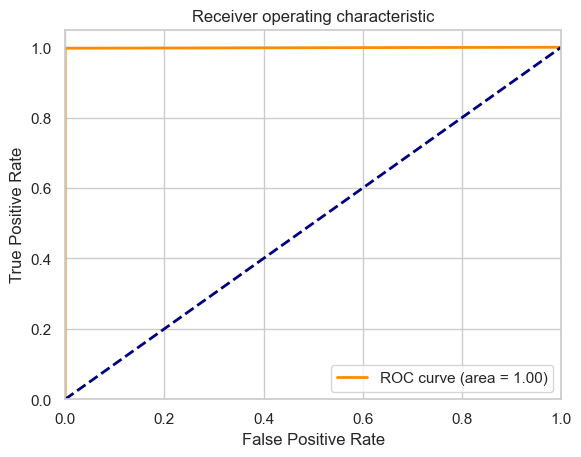

 
Training Accuracy :  1.0
Test Accuracy :  0.9986486486486487


In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model_3 = RandomForestClassifier()
model_3.fit(xtrain, ytrain)
X_train_pred_3 = model_3.predict(xtrain)
X_test_pred_3 = model_3.predict(xtest)
print("Detailed Analysis of RandomForestClassifier Model")
print(" ")
print("Accuracy : ", accuracy_score(ytest, X_test_pred_3))
print("Precision score : ", precision_score(ytest, X_test_pred_3))
print("F1 score : ", f1_score(ytest, X_test_pred_3))
print("Recall : ", recall_score(ytest, X_test_pred_3))
cm = confusion_matrix(ytest, X_test_pred_3)
print(f"Confusion Matrix:\n{cm}")

y_prob_3 = model_2.predict_proba(xtest)[:, 1]
roc_score_3 = roc_auc_score(ytest, y_prob_3)
print('ROC AUC Score for Model 2:', roc_score_3)

print('#=========#=========#')

print(classification_report(ytest, X_test_pred_3))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, X_test_pred_3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(" ")
print("Training Accuracy : ", accuracy_score(ytrain, X_train_pred_3))
print("Test Accuracy : ", accuracy_score(ytest, X_test_pred_3))

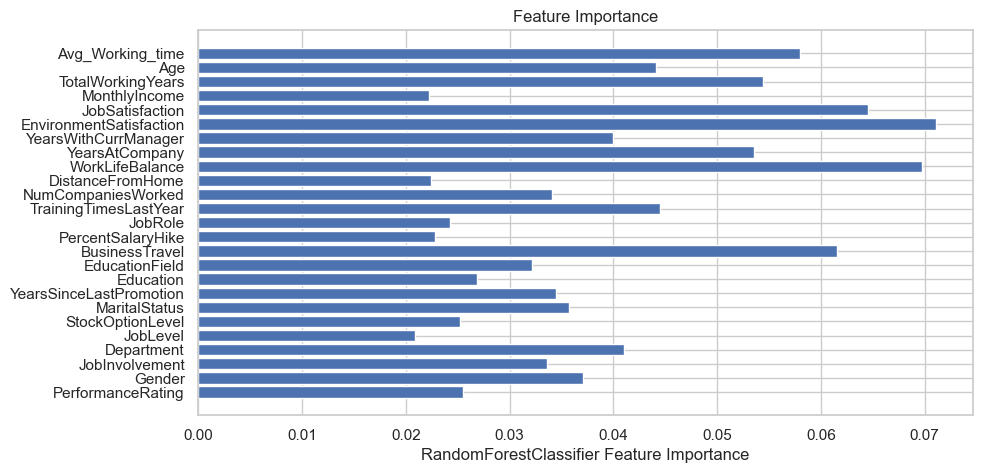

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model_3 = RandomForestClassifier()
model_3.fit(xtrain, ytrain)

sorted_idx = model_3.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(x.columns[sorted_idx], model_1.feature_importances_[sorted_idx])
plt.xlabel("RandomForestClassifier Feature Importance")
plt.title("Feature Importance")

plt.show()

In [87]:
df.loc[5213]

Age                           52.000000
BusinessTravel                 2.000000
Department                     1.000000
DistanceFromHome               7.000000
Education                      1.000000
EducationField                 1.000000
Gender                         0.000000
JobLevel                       2.000000
JobRole                        6.000000
MaritalStatus                  1.000000
MonthlyIncome              47740.000000
NumCompaniesWorked             2.000000
PercentSalaryHike             18.000000
StockOptionLevel               1.000000
TotalWorkingYears             11.000000
TrainingTimesLastYear          2.000000
YearsAtCompany                 8.000000
YearsSinceLastPromotion        7.000000
YearsWithCurrManager           7.000000
JobInvolvement                 3.000000
PerformanceRating              3.000000
EnvironmentSatisfaction        3.000000
JobSatisfaction                2.000000
WorkLifeBalance                2.000000
Avg_Working_time               7.899815


In [88]:
x = df.loc[5213]
x.values.tolist()

[52.0,
 2.0,
 1.0,
 7.0,
 1.0,
 1.0,
 0.0,
 2.0,
 6.0,
 1.0,
 47740.0,
 2.0,
 18.0,
 1.0,
 11.0,
 2.0,
 8.0,
 7.0,
 7.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 7.8998145733286576,
 1.0]

In [89]:
# Model Prediction

x = model_1.predict([[52.0,
 2.0,
 1.0,
 7.0,
 1.0,
 1.0,
 0.0,
 2.0,
 6.0,
 1.0,
 47740.0,
 2.0,
 18.0,
 1.0,
 11.0,
 2.0,
 8.0,
 7.0,
 7.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 7.8998145733286576]])

if x[0]==1:
  print()
  print('Predicted Status: Yes')
  print()
else :
  print()
  print('Predicted Status: No')
  print()


Predicted Status: Yes



In [2]:
import pandas as pd
xgbdf = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\EA_Raw_data.csv")
xgbdf

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time,Years_At_Company_Bin,Percent_Salary_Hike_Bin,Years_With_Current_Manager_Bin
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,3,3,3,4,2,7.373651,0-1 years,10-15 % Salary Hike,Less than Year
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,4,2,4,3,2,4,7.718969,2-5 years,20-25 % Salary Hike,2-5 years
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,3,3,3,2,2,1,7.013240,2-5 years,10-15 % Salary Hike,2-5 years
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,2,3,4,4,3,7.193678,5-10 years,10-15 % Salary Hike,2-5 years
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,3,3,4,1,3,8.006175,5-10 years,10-15 % Salary Hike,2-5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,2,3,3,4,1,3,8.522277,2-5 years,15-20 % Salary Hike,2-5 years
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,2,3,4,4,3,6.092954,2-5 years,10-15 % Salary Hike,2-5 years
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,2,3,4,1,3,3,7.706632,2-5 years,15-20 % Salary Hike,2-5 years
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,2,3,4,1,3,9.492595,5-10 years,10-15 % Salary Hike,5-10 years


In [4]:
xgbdf.drop(columns=['EmployeeCount','EmployeeID','Years_At_Company_Bin','Percent_Salary_Hike_Bin','Years_With_Current_Manager_Bin','StandardHours'],inplace=True)

In [79]:
xgbdf.shape

(4410, 26)

In [8]:
x = xgbdf.loc[1]
x.values.tolist()

[31,
 'Yes',
 'Travel_Frequently',
 'Research & Development',
 10,
 1,
 'Life Sciences',
 'Female',
 1,
 'Research Scientist',
 'Single',
 41890,
 0,
 23,
 1,
 6.0,
 3,
 5,
 1,
 4,
 2,
 4,
 3,
 2,
 4,
 7.718968927]

In [90]:
x = model_1.predict([[26,
 1,
 1,
 8,
 3,
 2,
 1,
 1,
 4,
 1,
 30330,
 1.0,
 12,
 0,
 5.0,
 2,
 5,
 1,
 2,
 2,
 3,
 3.0,
 4.0,
 3.0,
 6.115757149554444]])

if x[0]==1:
  print()
  print('Predicted Status: Yes')
  print()
else :
  print()
  print('Predicted Status: No')
  print()


Predicted Status: No



## We are choosing Extreme Gradient Boosting Model for Predict Attrition.

### Downloading Model by Pickle Model

In [91]:
with open('EA_classification_model.pkl','wb') as f:
  pickle.dump(model_1,f)

In [92]:
with open(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\EA_classification_model.pkl", 'rb') as f:
    model = pickle.load(f)

In [93]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##  Conclusion